### Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
#checking for null values
day.isnull().values.any()

False

In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# dropping the unnecessary columns
day.drop(['instant','dteday','casual','registered'],axis=1,inplace = True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### EDA - To find correlation between variables
### As number of users (cnt) is the target variable, we need to find how the factors such as season, temperature, weather, holidays affect the user base
### Hence, plotting the cnt against these variables might provide insight

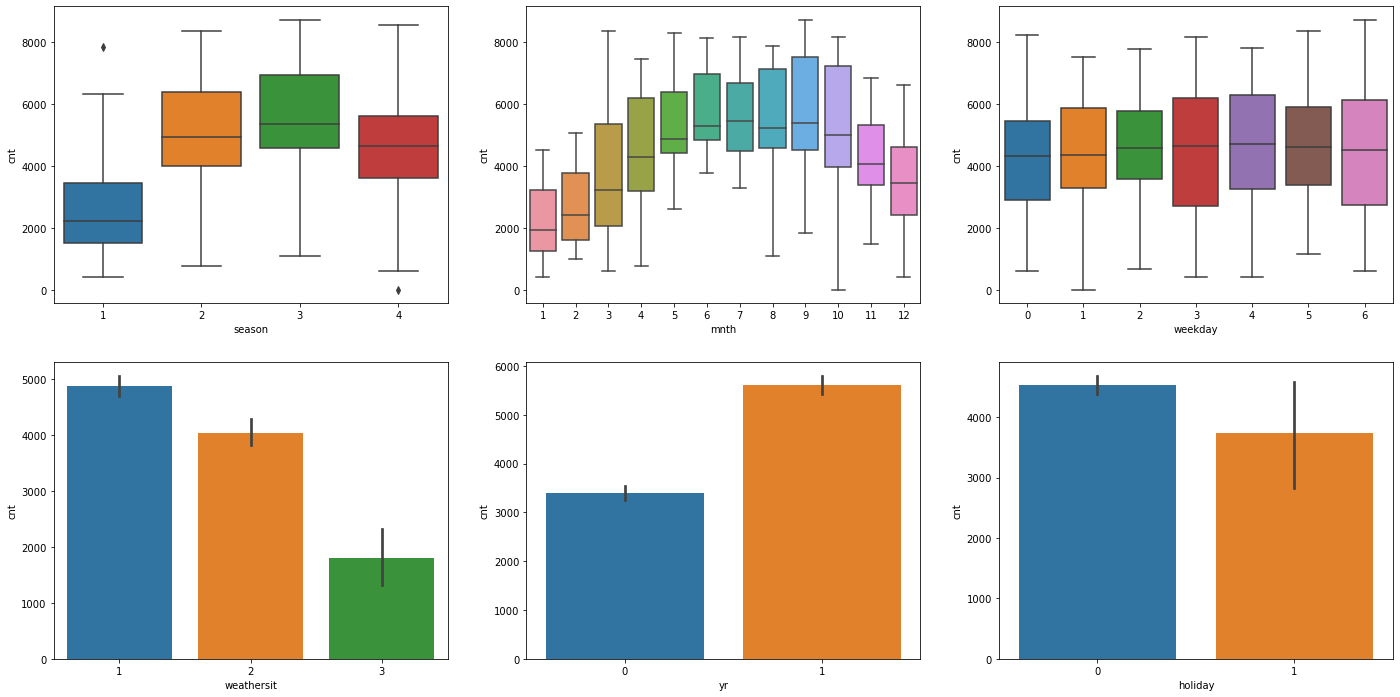

In [7]:
# Categorical variable visualization
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=day)

plt.subplot(2,3,2)
sns.boxplot(x="mnth",y="cnt",data=day)

plt.subplot(2,3,3)
sns.boxplot(x="weekday",y="cnt",data=day)

plt.subplot(2,3,4)
sns.barplot(x="weathersit",y="cnt",data=day)

plt.subplot(2,3,5)
sns.barplot(x="yr",y="cnt",data=day)

plt.subplot(2,3,6)
sns.barplot(x="holiday",y="cnt",data=day)

plt.show()

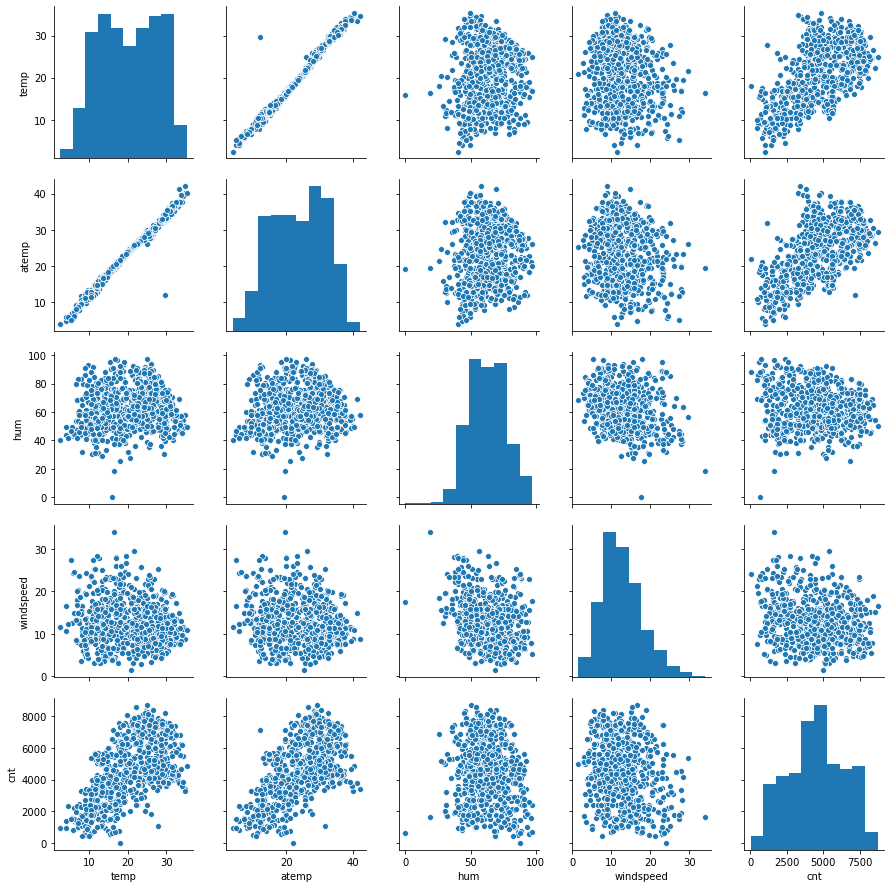

In [8]:
# Numeric variable visualization
sns.pairplot(day, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Preparing the data - Replacing the unordered numeric categorical data with appropriate string values

In [9]:
# Seasons
day['season'] = day['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [10]:
# Months
months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
day['mnth'] = day['mnth'].map(months)

In [11]:
# Weeks
weeks = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
day['weekday'] = day['weekday'].map(weeks)

In [12]:
# Weather situation
weather_situation = {1: "Clear", 2: "Cloudy_Misty", 3: "Rainy_Snowy", 4: "Stormy_Icy"}
day['weathersit'] = day['weathersit'].map(weather_situation)

In [13]:
day.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy_Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy_Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Cloudy_Misty,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Cloudy_Misty,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Creating Dummies

In [14]:
# Dummies for season
season_dummies = pd.get_dummies(day['season'], drop_first=True)
season_dummies.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
# Dummies for month
month_dummies = pd.get_dummies(day['mnth'], drop_first=True)
month_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [16]:
# Dummies for weeks
week_dummies = pd.get_dummies(day['weekday'], drop_first=True)
week_dummies.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [17]:
# Dummies for weather situation
weather_dummies = pd.get_dummies(day['weathersit'], drop_first=True)
weather_dummies.head()

,Cloudy_Misty,Rainy_Snowy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


### Joining the dummy columns with main data frame

In [18]:
day = pd.concat([day, season_dummies, month_dummies, week_dummies, weather_dummies], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy_Misty,Rainy_Snowy
0,Spring,0,Jan,0,Sat,0,Cloudy_Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,Jan,0,Sun,0,Cloudy_Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# creating a new data frame with dummy columns after dropping the original categorical columns
day_dummies = day.drop(['season', 'mnth', 'weekday','weathersit'], axis=1)
day_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy_Misty,Rainy_Snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting into train and test data

In [20]:
df_train, df_test = train_test_split(day_dummies, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features

In [21]:
# MinMax Scaling
scaler = MinMaxScaler()

# Numeric variables list
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy_Misty,Rainy_Snowy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df_train[numeric_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


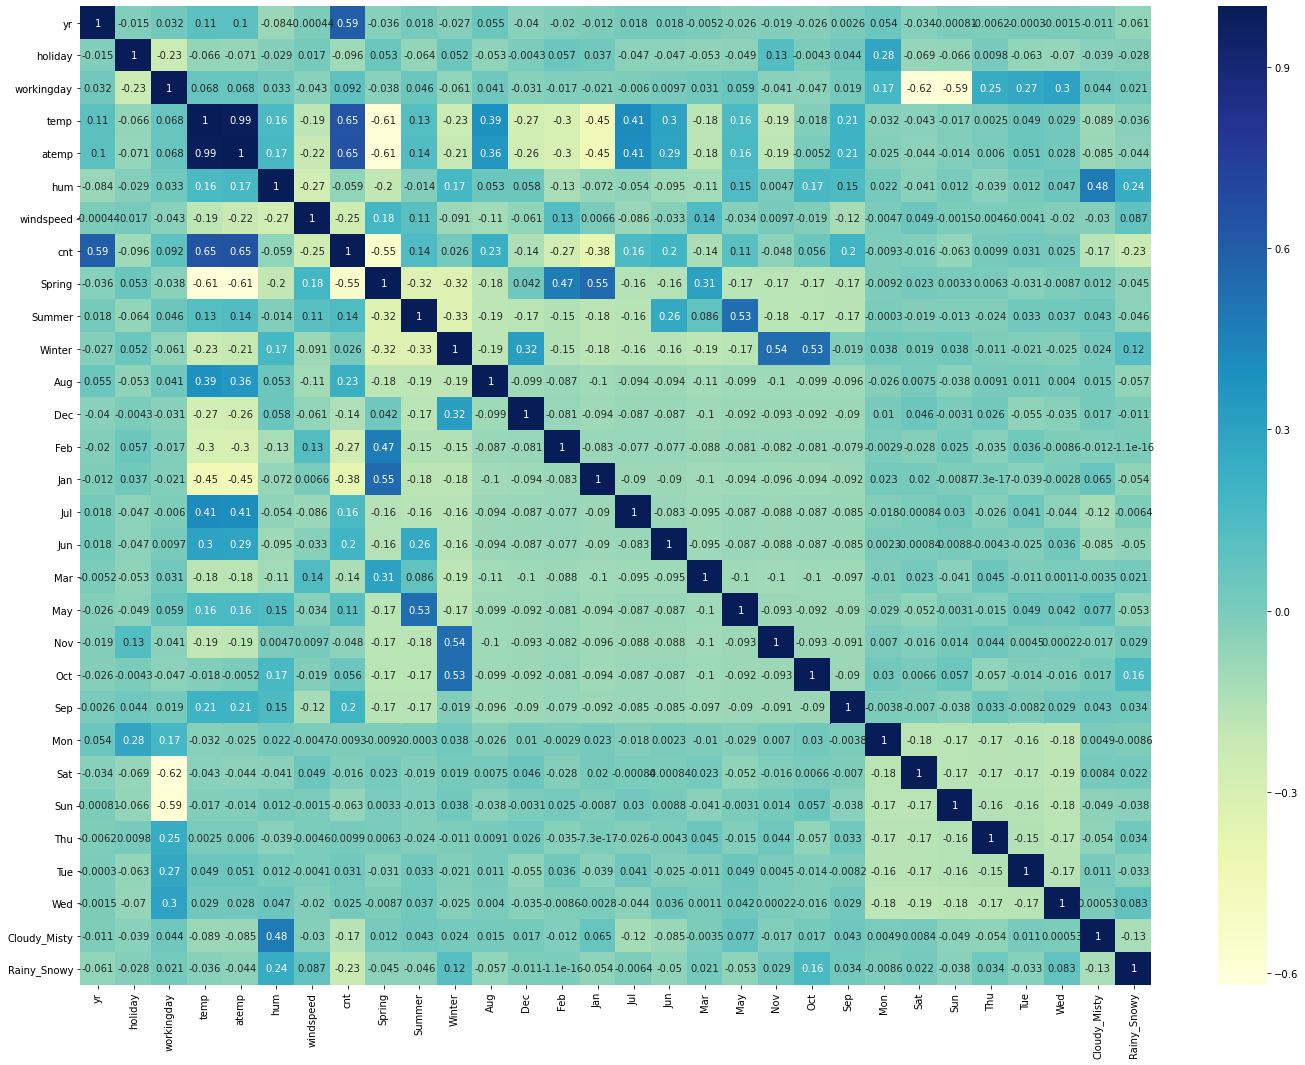

In [23]:
# Heatmap visualization
plt.figure(figsize=(24,18))
sns.heatmap(df_train.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

### Dividing into X and y sets for the model building

In [24]:
# Extracting the x and y trains
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Building the model - RFE

In [26]:
# RFE with 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Cloudy_Misty', True, 1),
 ('Rainy_Snowy', True, 1)]

In [28]:
# Columns useful according to RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Cloudy_Misty',
       'Rainy_Snowy'],
      dtype='object')

In [29]:
# Columns not useful according to RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel
### Model 0

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        23:37:01   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2519      0.036      6.969   

### VIF

In [31]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
7,Spring,5.08
4,temp,3.89
9,Winter,3.59
8,Summer,2.65
5,hum,1.91
3,workingday,1.88
13,Sat,1.78
10,Jan,1.57
14,Cloudy_Misty,1.57


In [32]:
# Dropping const column
X_train_rfe = X_train_rfe.drop('const', axis=1)

# Dropping the holiday column as it has high p-value and low VIF
X = X_train_rfe.drop('holiday', axis=1)

### Model I - Dropped the Holiday column as it has high p-value and low VIF

In [33]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.01e-191
Time:                        23:37:01   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2428      0.036      6.737      0.000       0.172       0.314
yr               0.2308      0.008     28.720      0.000       0.215       0.247
workingday       0.0520      0.011      4.795      0.000       0.031       0.073
temp             0.5094      0.034     14.775      0.000       0.442       0.577
hum             -0.1546      0.037     -4.128      0.000      -0.228      -0.081
windspeed       -0.1869      0.026     -7.310      0.000      -0.237      -0.137
Spring          -0.0519      0.021     -2.502      0.013      -0.093      -0.011
Summer           0.0510      0.015      3.429      0.001       0.022       0.080
Winter           0.0922      0.017      5.324      0.000       0.058       0.126
Jan             -0.0352      0.017     -2.019      0.044      -0.069      -0.001
Jul             -0.0518      0.018     -2.857      0.004      -0.087      -0.016
Sep              0.0794      0.016      4.811      0.000       0.047       0.112
Sat              0.0623      0.014      4.461      0.000       0.035       0.090
Cloudy_Misty    -0.0561      0.010     -5.394      0.000      -0.076      -0.036
Rainy_Snowy     -0.2467      0.026     -9.445      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       73.357   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.156
Skew:                          -0.726   Prob(JB):                     1.39e-41
Kurtosis:                       5.597   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.44
6,Spring,5.08
3,temp,3.89
8,Winter,3.59
7,Summer,2.65
4,hum,1.91
2,workingday,1.65
12,Sat,1.64
9,Jan,1.57
13,Cloudy_Misty,1.57


In [35]:
# Dropping the Jan column as it has high p-value and low VIF
X = X_train_rfe.drop('Jan', axis=1)

### Model II - Dropped the Jan column as it has high p-value and low VIF and also comes under winter season

In [36]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.54e-191
Time:                        23:37:01   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2307      0.036      6.472      0.000       0.161       0.301
yr               0.2300      0.008     28.568      0.000       0.214       0.246
workingday       0.0518      0.011      4.764      0.000       0.030       0.073
temp             0.5278      0.033     15.827      0.000       0.462       0.593
hum             -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed       -0.1815      0.026     -7.114      0.000      -0.232      -0.131
Spring          -0.0566      0.021     -2.740      0.006      -0.097      -0.016
Summer           0.0541      0.015      3.640      0.000       0.025       0.083
Winter           0.0983      0.017      5.738      0.000       0.065       0.132
Jul             -0.0535      0.018     -2.946      0.003      -0.089      -0.018
Sep              0.0799      0.017      4.831      0.000       0.047       0.112
Sat              0.0619      0.014      4.420      0.000       0.034       0.089
Cloudy_Misty    -0.0561      0.010     -5.379      0.000      -0.077      -0.036
Rainy_Snowy     -0.2442      0.026     -9.330      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.14
6,Spring,5.02
3,temp,3.62
8,Winter,3.48
7,Summer,2.62
4,hum,1.91
2,workingday,1.65
11,Sat,1.64
12,Cloudy_Misty,1.57
9,Jul,1.49


In [38]:
# Dropping the Sat column
X = X_train_rfe.drop('Sat', axis=1)

### Model III - Dropped the Sat column as the above plotted graphs show that all the days of the week have similar users

In [39]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.43e-188
Time:                        23:37:01   Log-Likelihood:                 505.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2675      0.035      7.580      0.000       0.198       0.337
yr               0.2292      0.008     27.958      0.000       0.213       0.245
workingday       0.0219      0.009      2.529      0.012       0.005       0.039
temp             0.5288      0.034     15.570      0.000       0.462       0.596
hum             -0.1718      0.038     -4.512      0.000      -0.247      -0.097
windspeed       -0.1812      0.026     -6.974      0.000      -0.232      -0.130
Spring          -0.0579      0.021     -2.750      0.006      -0.099      -0.017
Summer           0.0535      0.015      3.537      0.000       0.024       0.083
Winter           0.0969      0.017      5.558      0.000       0.063       0.131
Jul             -0.0545      0.018     -2.949      0.003      -0.091      -0.018
Sep              0.0801      0.017      4.755      0.000       0.047       0.113
Cloudy_Misty    -0.0522      0.011     -4.931      0.000      -0.073      -0.031
Rainy_Snowy     -0.2355      0.027     -8.860      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       61.905   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.348
Skew:                          -0.585   Prob(JB):                     1.38e-38
Kurtosis:                       5.615   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.69
6,Spring,5.02
3,temp,3.62
8,Winter,3.48
7,Summer,2.62
4,hum,1.89
11,Cloudy_Misty,1.56
9,Jul,1.49
10,Sep,1.29
12,Rainy_Snowy,1.24


In [41]:
# Dropping workingday column
X = X_train_rfe.drop('workingday', axis=1)

### Model IV - Dropped the workingday column

In [42]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.16e-188
Time:                        23:37:02   Log-Likelihood:                 502.04
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     498   BIC:                            -929.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2831      0.035      8.102      0.000       0.214       0.352
yr               0.2297      0.008     27.882      0.000       0.214       0.246
temp             0.5310      0.034     15.555      0.000       0.464       0.598
hum             -0.1733      0.038     -4.528      0.000      -0.249      -0.098
windspeed       -0.1840      0.026     -7.052      0.000      -0.235      -0.133
Spring          -0.0587      0.021     -2.775      0.006      -0.100      -0.017
Summer           0.0535      0.015      3.517      0.000       0.024       0.083
Winter           0.0951      0.018      5.431      0.000       0.061       0.130
Jul             -0.0562      0.019     -3.024      0.003      -0.093      -0.020
Sep              0.0798      0.017      4.711      0.000       0.047       0.113
Cloudy_Misty    -0.0509      0.011     -4.787      0.000      -0.072      -0.030
Rainy_Snowy     -0.2326      0.027     -8.711      0.000      -0.285      -0.180
==============================================================================
Omnibus:                       69.912   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.944
Skew:                          -0.702   Prob(JB):                     1.03e-38
Kurtosis:                       5.503   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.36
5,Spring,5.01
2,temp,3.61
7,Winter,3.48
6,Summer,2.62
3,hum,1.89
10,Cloudy_Misty,1.55
8,Jul,1.48
9,Sep,1.29
11,Rainy_Snowy,1.24


In [44]:
# Dropping Jul column
X = X_train_rfe.drop('Jul', axis=1)

### Model V - Dropped the Jul column as it comes under summer season

In [45]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.22e-187
Time:                        23:37:02   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -972.8
Df Residuals:                     499   BIC:                            -926.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2703      0.035      7.731      0.000       0.202       0.339
yr               0.2305      0.008     27.763      0.000       0.214       0.247
temp             0.5151      0.034     15.148      0.000       0.448       0.582
hum             -0.1661      0.039     -4.314      0.000      -0.242      -0.090
windspeed       -0.1828      0.026     -6.949      0.000      -0.234      -0.131
Spring          -0.0465      0.021     -2.220      0.027      -0.088      -0.005
Summer           0.0700      0.014      4.889      0.000       0.042       0.098
Winter           0.1082      0.017      6.322      0.000       0.075       0.142
Sep              0.0948      0.016      5.805      0.000       0.063       0.127
Cloudy_Misty    -0.0505      0.011     -4.714      0.000      -0.072      -0.029
Rainy_Snowy     -0.2355      0.027     -8.755      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       76.343   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.212
Skew:                          -0.764   Prob(JB):                     4.97e-42
Kurtosis:                       5.572   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.28
5,Spring,4.83
2,temp,3.53
7,Winter,3.26
6,Summer,2.28
3,hum,1.89
9,Cloudy_Misty,1.55
10,Rainy_Snowy,1.24
4,windspeed,1.19
8,Sep,1.18


In [47]:
# Dropping hum column
X = X_train_rfe.drop('hum', axis=1)

### Model VI - Dropped the hum column as it is correlated with weather situation parameters which can be seen in the heat map plotted above

In [48]:
# Creating another model
X_train_rfe = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.51e-185
Time:                        23:37:02   Log-Likelihood:                 488.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     500   BIC:                            -913.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1890      0.030      6.308      0.000       0.130       0.248
yr               0.2345      0.008     27.936      0.000       0.218       0.251
temp             0.4790      0.034     14.284      0.000       0.413       0.545
windspeed       -0.1498      0.026     -5.849      0.000      -0.200      -0.099
Spring          -0.0580      0.021     -2.747      0.006      -0.100      -0.017
Summer           0.0621      0.014      4.301      0.000       0.034       0.091
Winter           0.0917      0.017      5.402      0.000       0.058       0.125
Sep              0.0873      0.017      5.282      0.000       0.055       0.120
Cloudy_Misty    -0.0771      0.009     -8.656      0.000      -0.095      -0.060
Rainy_Snowy     -0.2809      0.025    -11.152      0.000      -0.330      -0.231
==============================================================================
Omnibus:                       73.466   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.169
Skew:                          -0.748   Prob(JB):                     3.38e-39
Kurtosis:                       5.470   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.98
4,Spring,4.75
2,temp,3.31
6,Winter,3.10
5,Summer,2.25
7,Sep,1.17
3,windspeed,1.09
9,Rainy_Snowy,1.05
8,Cloudy_Misty,1.04
1,yr,1.02


In [50]:
y_train_pred = lm.predict(X_train_rfe)

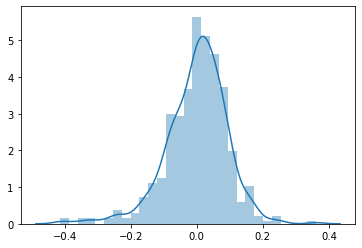

In [51]:
# Getting the residual errors
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

### Predictions and Evaluation on the test set

In [52]:
# Numeric variables list
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy_Misty,Rainy_Snowy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [53]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy_Misty,Rainy_Snowy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Dropping const column to as the test data does not have it 
X_train_rfe = X_train_rfe.drop('const', axis=1)
# Add constant
X_test_sm = X_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,temp,windspeed,Spring,Summer,Winter,Sep,Cloudy_Misty,Rainy_Snowy
184,1.0,0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0


In [56]:
# Predict
y_test_pred = lm.predict(X_test_sm)

In [57]:
# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8009599227555844

Text(0, 0.5, 'y_pred')

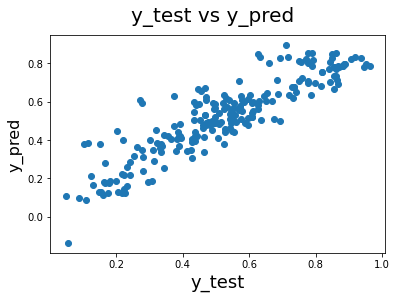

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [59]:
y_test_pred.describe()

count    220.000000
mean       0.521310
std        0.200785
min       -0.136369
25%        0.402717
50%        0.531699
75%        0.658552
max        0.894341
dtype: float64

### Report -
#### Features that seem to affect the count of users - Temperature, weather situation, year

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8009599227555844